<a href="https://colab.research.google.com/github/LazyHooks/models_aon_FI/blob/main/bin_startup_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [56]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [58]:
dataset = pd.read_csv('FI_Startup_Sales_Bin.csv')

split

In [59]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [60]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [61]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [62]:
print(model.feature_importances_)

[0.         0.05169722 0.074787   0.         0.05275364 0.
 0.02360495 0.06072699 0.08336847 0.         0.04851524 0.07331052
 0.1204527  0.04167468 0.0238518  0.         0.10366189 0.03089309
 0.04109947 0.08571012 0.         0.04158799 0.04230421]


feature importance & weights

In [63]:
#1 Pay Positioning <20
#2 Pay Positioning 20<x<40
#3 Pay Positioning 40<X<60
#4 Pay Positioning 60<X<80
#5 Pay Positioning <80
#6 Pay Range <20
#7 Pay Range 20<x<40
#8 Pay Range 40<X<60
#9 Pay Range 60<X<80
#10 Pay Range <80
#11 Internal
#12 Balanced
#13 External
#14 Pay Differentiation <20
#15 Pay Differentiation 20<x<40
#16 Pay Differentiation 40<X<60
#17 Pay Differentiation 60<X<80
#18 Pay Differentiation <80
#19 Pay Mix <20
#20 Pay Mix 20<x<40
#21 Pay Mix 40<X<60
#22 Pay Mix 60<X<80
#23 Pay Mix <80



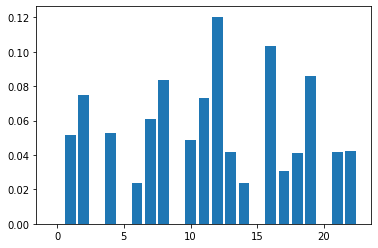

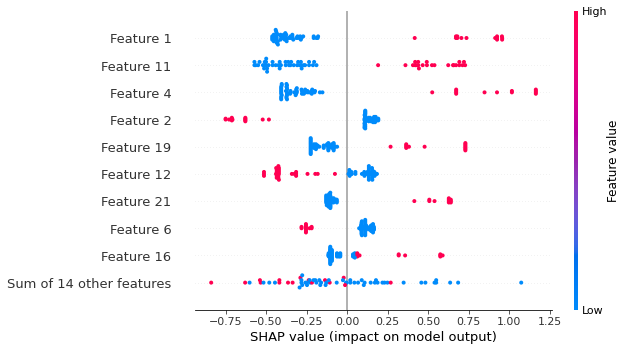

In [64]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
	


predict

In [65]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [66]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='binary')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 54.55%
Precision: 0.500
Recall: 0.200
F-Measure: 0.286


visualise single

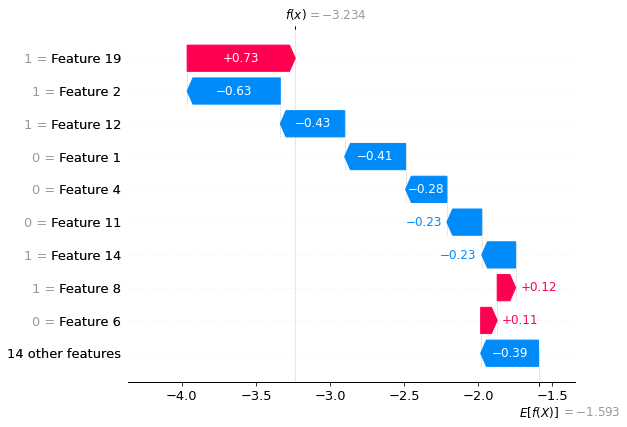

In [67]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [68]:
#singlepred = model.predict([[0,1,1,1,1,0,0,5,5]])
#singleprediction = [round(value) for value in y_pred]
#print(singlepred)